In [25]:
from quantum_error_correction_code import SurfaceCode, deformation_cmap

from jax import random
import jax.numpy as jnp

from matplotlib import pyplot as plt

key = random.key(0)

Deformation: [0 0 5 0 5 5 5 0 5 0 0 3 0 0 5 0 5 3 3 0 5 0 3 3 0]


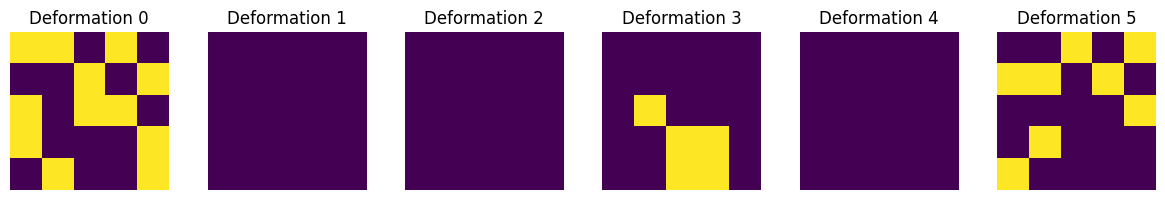

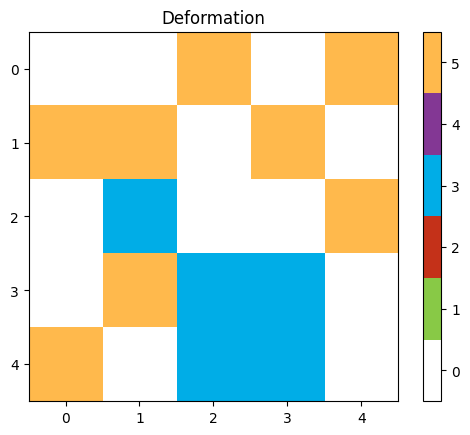

X error: [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Z error: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Syndrome: [0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
Logicals: [1 1]


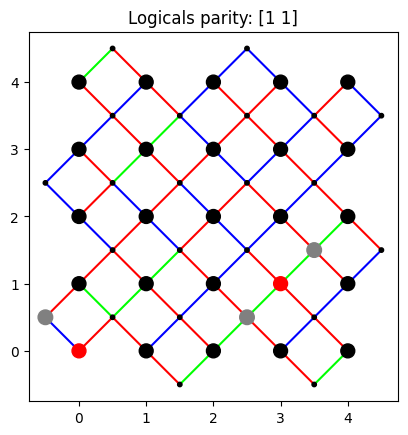

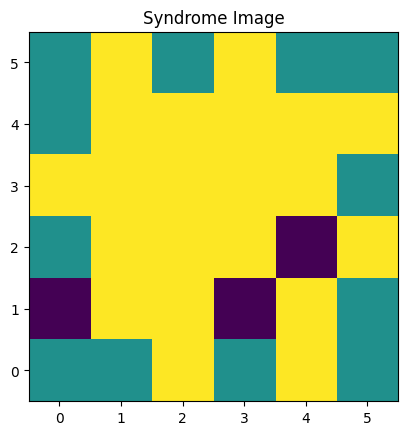

In [40]:
code = SurfaceCode(5)

deformation, key = code.random_deformation(key, allowed_deformations=jnp.array([0, 3, 5]))
print("Deformation:", deformation)
deformation_img = code.deformation_image(deformation)
fig, axs = plt.subplots(ncols=6, figsize=(12, 2))
for i, channel in enumerate(deformation_img):
    axs[i].imshow(channel)
    axs[i].set_title(f"Deformation {i}")
    axs[i].axis("off")
plt.tight_layout()
plt.show()

plt.figure()
plt.imshow(deformation.reshape(5, 5), cmap=deformation_cmap, vmin=-.5, vmax=5.5)
plt.title("Deformation")
plt.colorbar()
plt.show()

parity_info = code.deformation_parity_info(deformation)

subkey, key = random.split(key)
probs = jnp.array([0.01, 0.02, 0.03])
error = code.error(subkey, probabilities=probs)

syndrome, logicals = code.syndrome(error, parity_info)
print("X error:", error[0].astype(jnp.int32))
print("Z error:", error[1].astype(jnp.int32))
print("Syndrome:", syndrome)
print("Logicals:", logicals)

code.show(parity_info, error)

syndrome_image, logicals = code.syndrome_img(error, parity_info)
plt.figure()
plt.imshow(syndrome_image, origin="lower")
plt.title("Syndrome Image")
plt.show()


Syndrome: [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Logicals: [0 1]
Error probability: 0.0022650016


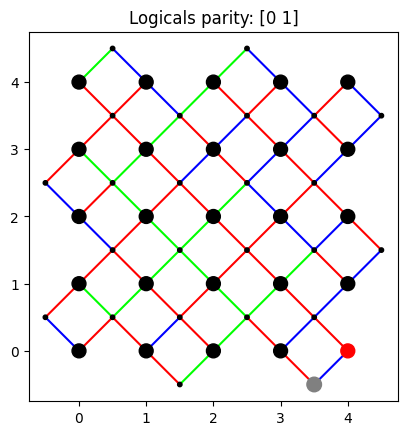

In [29]:
parity_info = code.deformation_parity_info(deformation)

subkey, key = random.split(key)
error = code.up_to_n_error(subkey, n=2)

syndrome, logicals = code.syndrome(error, parity_info)
print("Syndrome:", syndrome)
print("Logicals:", logicals)

error_prob = code.error_likelihood(error, probabilities=probs)
print("Error probability:", error_prob)

code.show(parity_info, error)

In [17]:
print(code.show_latex_code(parity_info, deformation))

% Draw the plaquettes
\filldraw[fill=black!10, draw=none] (0,0) -- (2,0) -- (2,2) -- (0,2) -- cycle;
\filldraw[fill=black!5, draw=none] (0,2) -- (2,2) -- (2,4) -- (0,4) -- cycle;
\filldraw[fill=black!10, draw=none] (0,4) -- (2,4) -- (2,6) -- (0,6) -- cycle;
\filldraw[fill=black!5, draw=none] (0,6) -- (2,6) -- (2,8) -- (0,8) -- cycle;
\filldraw[fill=black!5, draw=none] (2,0) -- (4,0) -- (4,2) -- (2,2) -- cycle;
\filldraw[fill=black!10, draw=none] (2,2) -- (4,2) -- (4,4) -- (2,4) -- cycle;
\filldraw[fill=black!5, draw=none] (2,4) -- (4,4) -- (4,6) -- (2,6) -- cycle;
\filldraw[fill=black!10, draw=none] (2,6) -- (4,6) -- (4,8) -- (2,8) -- cycle;
\filldraw[fill=black!10, draw=none] (4,0) -- (6,0) -- (6,2) -- (4,2) -- cycle;
\filldraw[fill=black!5, draw=none] (4,2) -- (6,2) -- (6,4) -- (4,4) -- cycle;
\filldraw[fill=black!10, draw=none] (4,4) -- (6,4) -- (6,6) -- (4,6) -- cycle;
\filldraw[fill=black!5, draw=none] (4,6) -- (6,6) -- (6,8) -- (4,8) -- cycle;
\filldraw[fill=black!5, draw=none] (

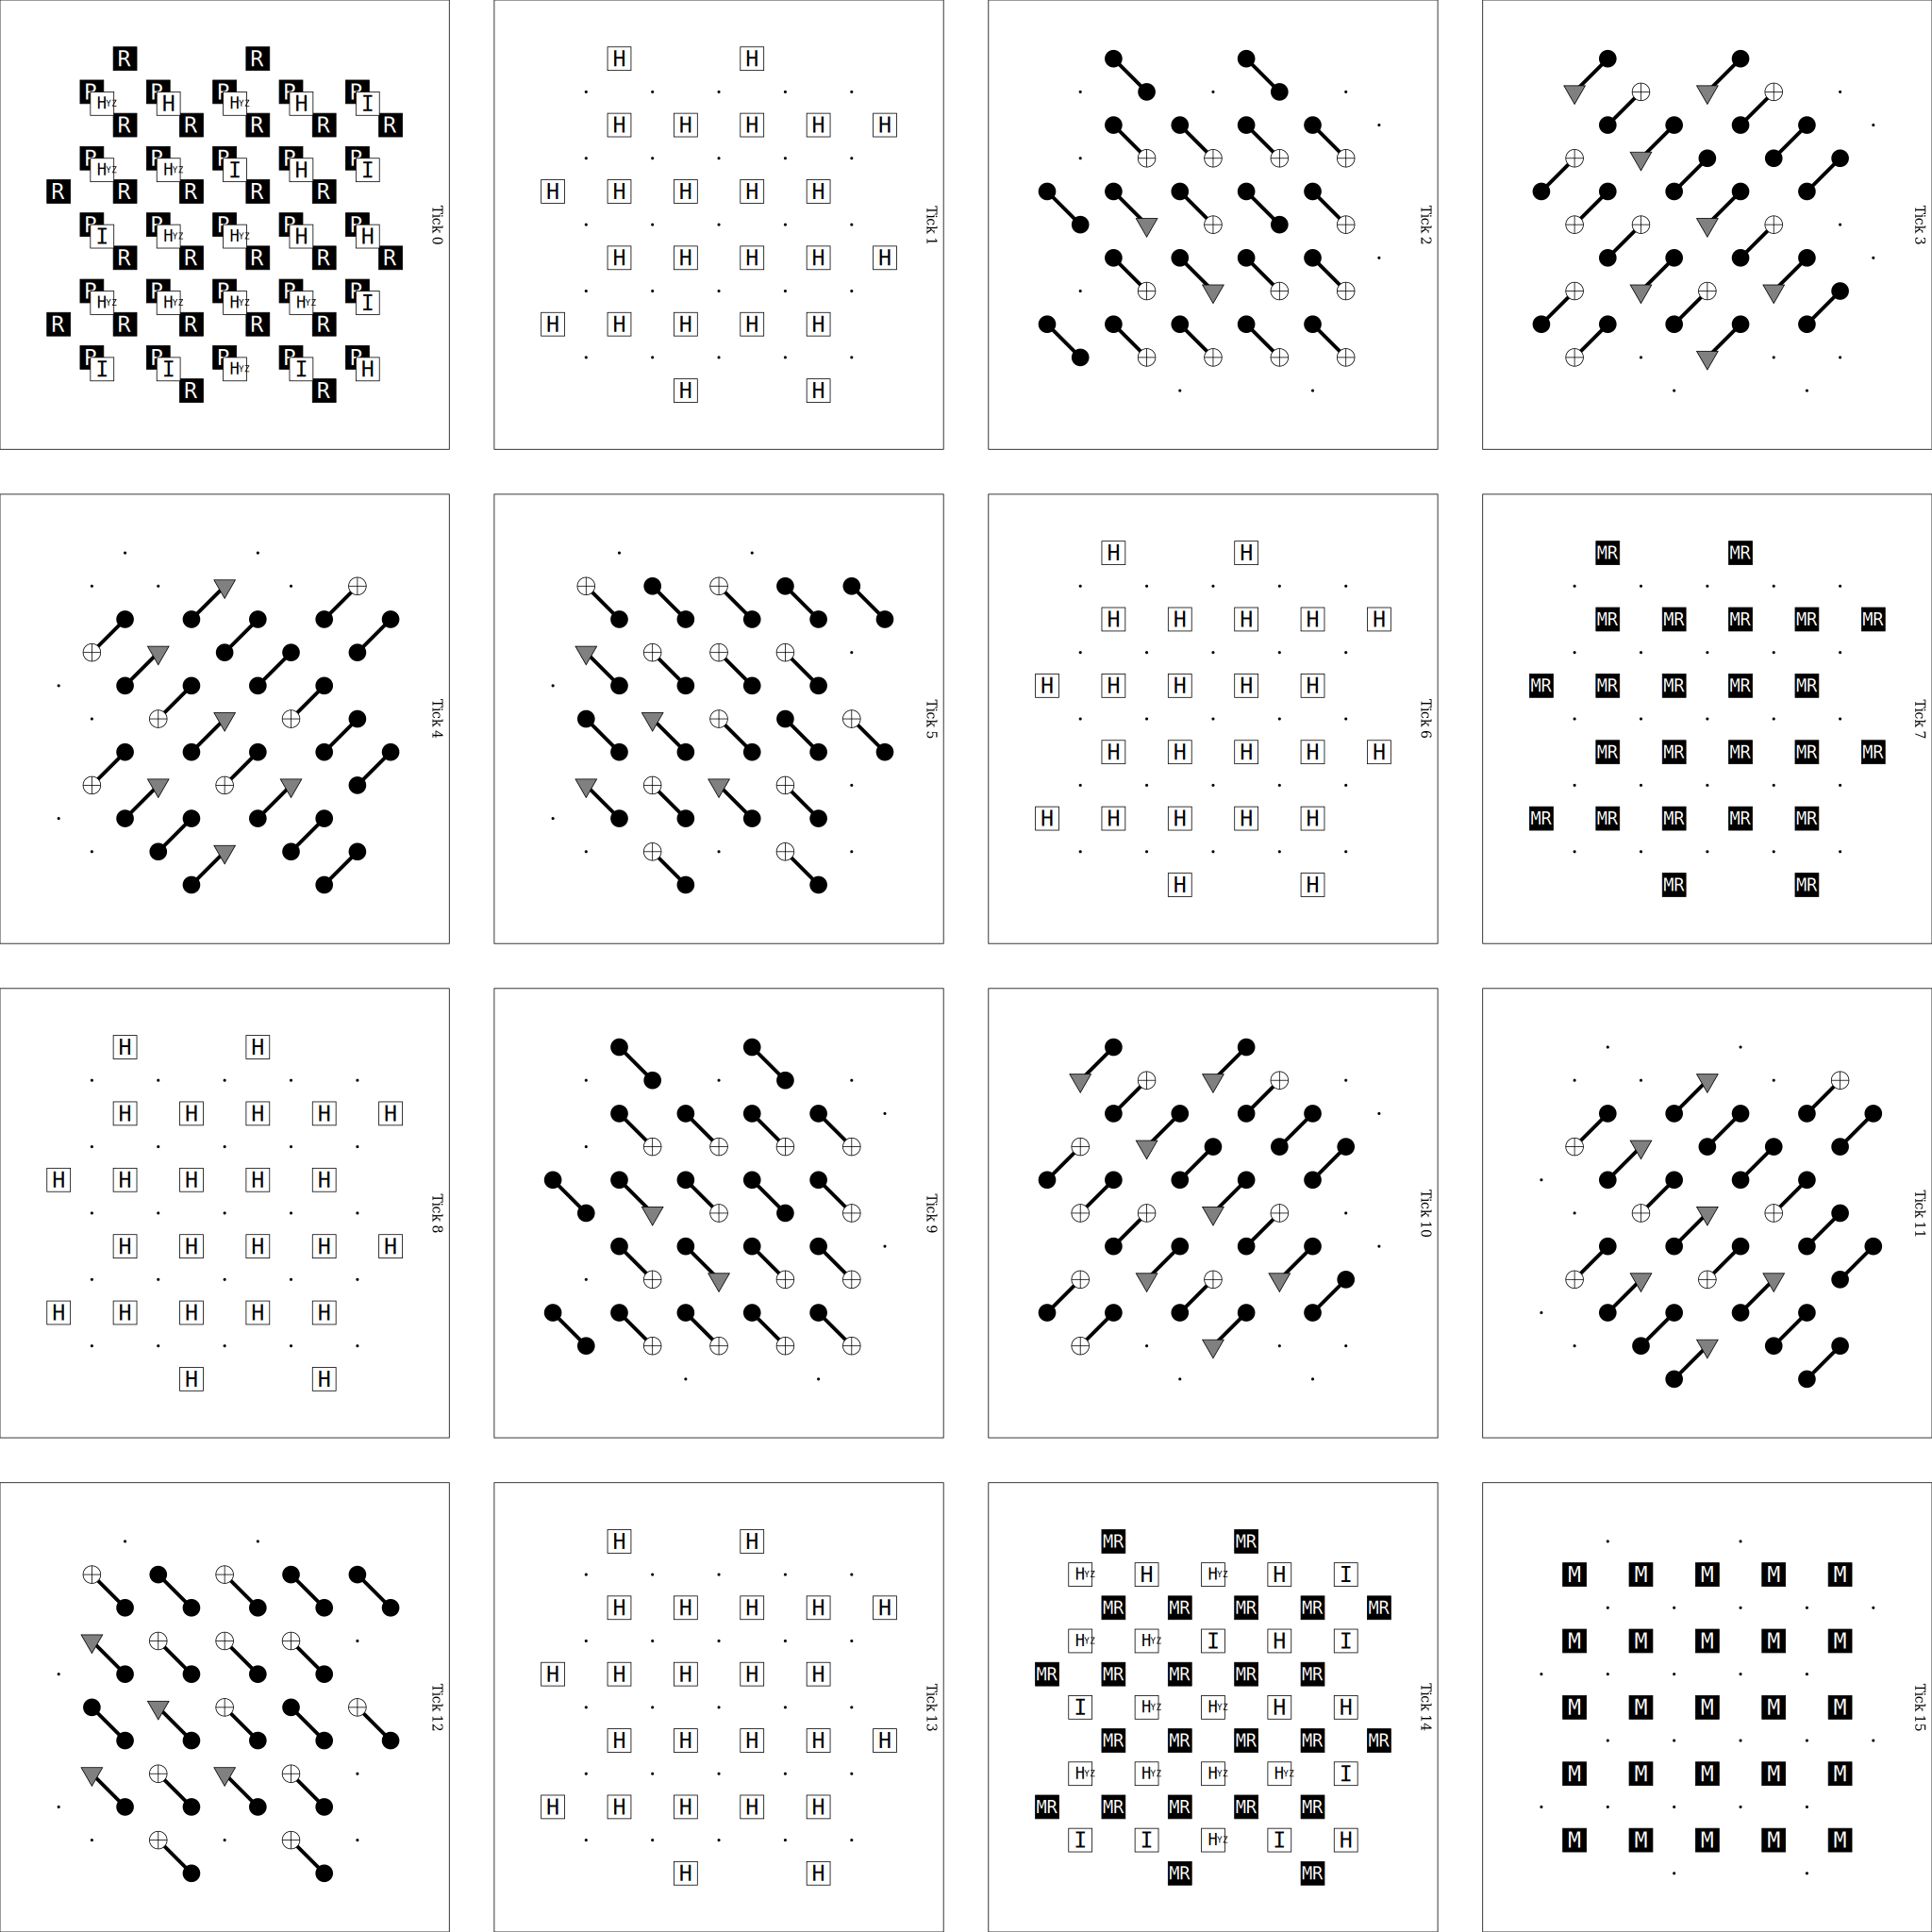

In [20]:
code.to_stim(parity_info, rounds=1).diagram('timeslice-svg')